# "Probability - d2l.ai Exercises - Part 6"
> "This notebook tries to solve the probability exercises in d2l.ai"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [d2l.ai-exercises, deep-learning, tensorflow]
- hide: false

## Prepare libraries, variables and functions for plotting

In [38]:
#collapse_show
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
from d2l import tensorflow as d2l

from matplotlib_venn import venn2

In [17]:
#collapse_show
def plot_estimates(estimates, title_str):
    d2l.set_figsize((6, 4.5))
    for i in range(6):
        d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
    d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
    d2l.plt.gca().set_xlabel('Groups of experiments')
    d2l.plt.gca().set_ylabel('Estimated probability')
    d2l.plt.legend();
    d2l.plt.title(title_str)

 ## Vary the number of samples and number of groups for the dice experiment. Observe and analyze the experimental results.

In [6]:
# set probabilities for each number
fair_probs = tf.ones(6) / 6

In [23]:
#hide
no_samples = 50
no_of_grps = 1000

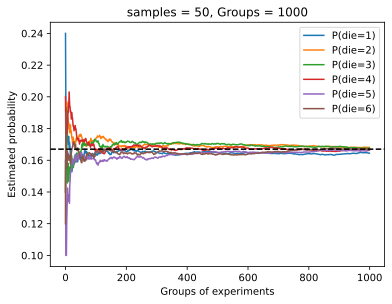

In [24]:
#hide_input
counts = tfp.distributions.Multinomial(no_samples, fair_probs).sample(no_of_grps)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)
plot_estimates(estimates, f"samples = {no_samples}, Groups = {no_of_grps}")

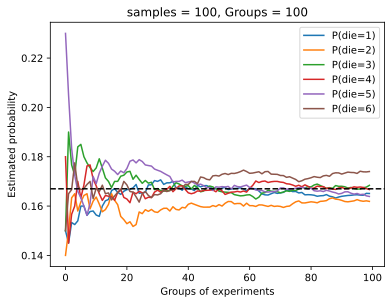

In [26]:
#hide_input
counts = tfp.distributions.Multinomial(100, fair_probs).sample(100)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)
plot_estimates(estimates, f"samples = 100, Groups = 100")

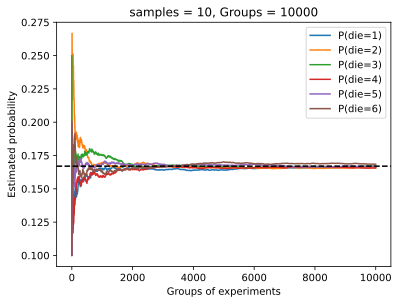

In [27]:
#hide_input
counts = tfp.distributions.Multinomial(10, fair_probs).sample(10000)
cum_counts = tf.cumsum(counts, axis=0)
estimates = cum_counts / tf.reduce_sum(cum_counts, axis=1, keepdims=True)
plot_estimates(estimates, f"samples = {10}, Groups = {10000}")

From this we can see that the more number of samples/experiment groups that we perform, the probability that a number will fall on the die getting close to `1/6`.

## Given two events with probability  $P(A)$  and  $P(B)$ , compute upper and lower bounds on  $P(A∪B)$  and  $P(A∩B)$ .

Let's sample 1000 from two events with $P(A) =0.5$ and $P(B) =0.7$ then represent the results in a venn diagram as hinted.

In [112]:
counts = tfp.distributions.Binomial(1, probs=[.5, .7]).sample(1000)
event_samples = list(counts.numpy().astype(int).tolist())

In [113]:
event_10 = event_samples.count([1,0])
event_01 = event_samples.count([0,1])
event_11 = event_samples.count([1,1])

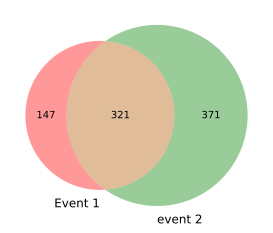

In [114]:
venn2((event_10, event_01, event_11), ('Event 1', 'event 2'))
d2l.plt.show()

From the diagram we can see that
$$ P(A) = 468/1000 = 0.468 (\approx 0.5) \\ 
P(B) = 692/1000 = 0.692 (\approx 0.7)$$

### Upper and lower bounds for $P(A∪B)$  and  $P(A∩B)$

Assuming **Upper bound** for $P(A∪B) = 1$, so that $$P(A∩B) >= P(A) + P(B) - 1 \\P(A∩B) >= 0.16$$
so the **lower bound** of $P(A∩B)$ is **0.16**.

The **upper bound** of $P(A∩B)$ would be $min(P(A), P(B))$, since the $P(A∩B)$ is event of both A and B ocurring together. Consequently **lower bound** of $P(A∪B)$ would be $max(P(A), P(B))$

so, $$P(A∩B) <= 0.468$$ and $$P(A∪B) >= 0.692$$

At last $$0.692 <= P(A∪B) <= 1$$  and  $$0.16<=P(A∩B)<=0.468$$

##Assume that we have a sequence of random variables, say  A ,  B , and  C , where  B  only depends on  A , and  C  only depends on  B , can you simplify the joint probability  P(A,B,C) ?

<!-- P(C | A, B) * P(A, B) = P(C | A, B) * (P(B | A) * P(A)) -->
Since this is a sequential occurence, A occurred first, B occurred second and at last C occurred.
<!-- P(A,B)=P(B∣A)P(A)  -->
Let's assume $A, B$ as one event $Z$

$$P(Z, C) = P(C|Z) * P(Z) $$

substituting value for $Z$
$$P(A, B, C) = P(C|A, B) * P(A, B) $$
$$P(A, B, C) = P(C|A, B) * P(A|B) * P(B)  $$

## In [Section 2.6.2.6](http://d2l.ai/chapter_preliminaries/probability.html#application), the first test is more accurate. Why not run the first test twice rather than run both the first and second tests?

We did not conduct the same test because simply put running the same test on the same person, will not give a different result.